In [15]:
options(repr.plot.width=3.5, repr.plot.height=3.5)

# Lab 3, CDF and PDF stuff

## Learning the functions

R has a bunch of stuff for distributions.

Say we wanted the length of every pencil in an elementary school, and that every length from 10cm - 20cm was equally likley, that would give us a uniform distribution (a distribution where every scenario is equally likley). in r, we make a uniform distribution by calling `unif(data, min, max)`. 

we can get a lot of info from the distribution. Here is a table for that: 

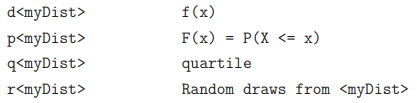
where myDist is a type of distribution. As an example, to get the PDF of our uniform distribution, type `dunif(data,min,max)` or to get the CDF of a binomial distribution, type `pbinom(data,size,prob)`

Here is all the types of distributions supported by R: 

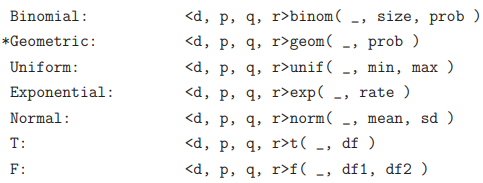




Now before we dive deeper, let's get an verarching example going: 

## Example

You are a chemical engineer measuring the water discharge of streams across Alberta. From past data, you recognize that the discharge rates of these streams are **uniformly distributed** ranging from $10\frac{cm^3}{s} \rightarrow 25 \frac{cm^3}{s}$. You want to get all the properties of this thing. 

Our random variable of interest is $X=\text{The daily discharge rate of a stream}$. Given that any discharge rate is equally likley, the PDF function (by definition) will be: 

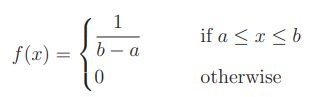

Plotting the PDF is done below:

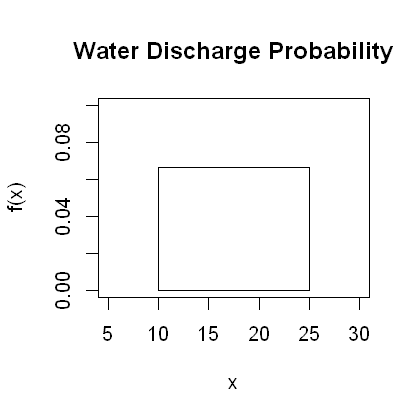

In [27]:
a = seq(10,25,length = 150)
prob = rep(1/(25-10), 150)
plot(a,prob, type="l", xlab="x", ylab="f(x)", xlim=c(5,30),ylim=c(0,0.1), main = "Water Discharge Probability")
polygon(c(10, a, 25), c(0, prob, 0))

## Question 1: What is the probability that the water discharge is at most 14$\frac{cm^3}{s}$?

In other words, what is $P(X≤14)$ which is actually just the definition of the CDF. Let's start by plotting the scenario:

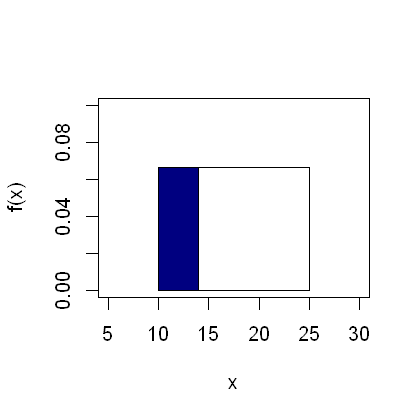

In [36]:
x = seq(10, 25, length=200) #The inputs
prob = dunif(x, min=10, max=25) #Gives each scenario the same probability of occuring
plot(x, prob, type="l", xlim=c(5,30), ylim=c(0,0.1), ylab="f(x)") #Plotting the line
polygon(c(10, x, 25), c(0, prob, 0))#Adding the vertical black lines on the sides

x = seq(10, 14, length=100) #Going from the minimum to 14 (this is what a PDF does, from a to b)
prob = dunif(x, min=10, max=25)
polygon(c(10, x, 14), c(0, prob, 0), col="navy")

Now let's calculate the probability that a random water discharge of some stream is less than or equal to 14 cm^3/s, in other words, what is: 

$$
P(X\le 14) 
$$

If we integrate the thing, we get the result to be: 

$$
F(14) = \int_{10}^{14}{\frac{1}{25−10} dx}=\frac{4}{15}=0.2\bar6
$$

what does the computer say?

In [39]:
punif(14, min = 10,max = 25)

[1] 0.2666667

Wow, easy!

## Question 2: What is the probability that a discharge is between 14 and 20 $\frac{cm^3}{s}$?

In other words, what is $P(14\le X\le20)$?

We know how to calculate this normally though! You just $P(X\le 20) - P(X\le 14) = F(20) - F(14)$

doing that manually yeilds:

$$
F(14) = \int_{10}^{14}{\frac{1}{25−10} dx}=\frac{4}{15}\\
F(20) = \int_{10}^{20}{\frac{1}{25−10} dx}=\frac{10}{15}\\
F(20)-F(14) = \frac{10}{15} - \frac{4}{15} = \frac{6}{15} = 0.4
$$

and the computer says:

In [41]:
punif(20, 10, 25)- punif(14, 10, 25)

[1] 0.4

Nice!

## Quartiles
To find the quartiles of data, you can use the letter `q` in front of it. It solves the equation $P(X<q_1) = 0.25$ to find what quartile 1 would be. Here it is working on a distribution from 1-100:

In [45]:
qunif(0.25, min=0, max=100) # q1
qunif(0.5, min=0, max=100) # q2
qunif(0.75, min=0, max=100) # q3

[1] 25

[1] 50

[1] 75

## Random Draws
Random draws are when you randomly measure the data of one of the guys in the sample, then put him back in and repeat that process for n number of times. 

In the stream case, that'd be like we have stream 1,2,3...n and we randomly draw measure the discharge of a random number (say 3) and then do it again and again 1000 times. We have the chance to measure stream 3 twice or more throughout this process (but it is unlikley). 

To simulate a random draw, use the r function:

In [47]:
a = 10 # minimum
b = 25 # maximum
x = runif(n=1000, min = a, max = b) #Randomly drawing 1000 times

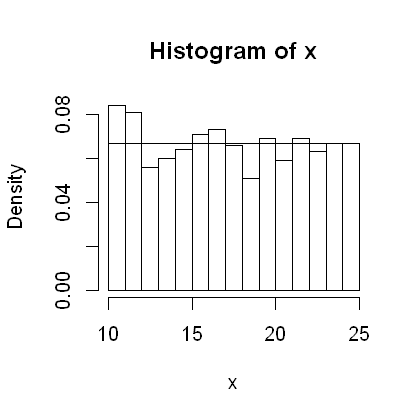

In [49]:
hist(x, prob=T)
curve(dunif(x, min=a, max=b), from=a, to=b, add=T)